In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [30]:
dicts = []
for seed in range(1000):
    with open('masks_lenet300/sc_sparsity=0.9_seed=' + str(seed), 'rb') as f:
        dicts.append(pickle.load(f))
len(dicts)

1000

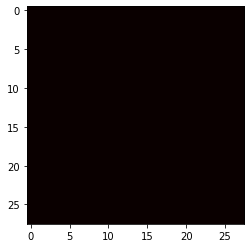

In [29]:
plt.imshow(np.sum(dicts[np.random.randint(1000)]['w1'], axis=(1)).reshape(28,28), cmap='hot')

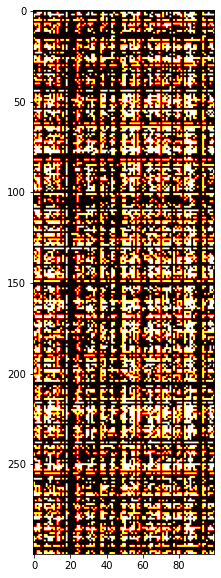

In [52]:
plt.figure(figsize=(7,10))
plt.imshow(dicts[np.random.randint(1000)]['w2'], cmap='hot')

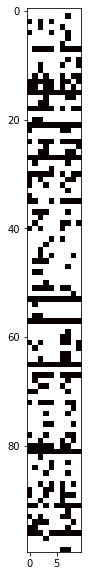

In [55]:
plt.figure(figsize=(7,10))
plt.imshow(dicts[np.random.randint(1000)]['w3'], cmap='hot')

In [4]:
w1s = []
for d in dicts:
    w1s.append(d['w1'])
w2s = []
for d in dicts:
    w2s.append(d['w2'])
w3s = []
for d in dicts:
    w3s.append(d['w3'])

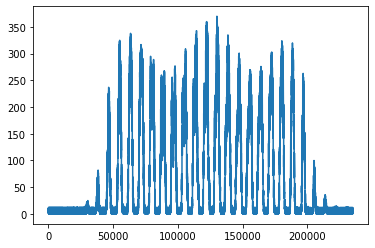

In [5]:
plt.plot(np.sum(w1s, axis=0).flatten())

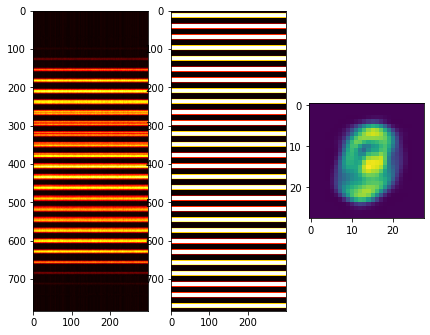

In [20]:
plt.figure(figsize=(7,10))
plt.subplot(131)
plt.imshow(np.sum(w1s, axis=0), cmap='hot')
plt.subplot(132)
plt.imshow(np.array([[0 for _ in range(300)] if i%28<8 or i%28>19 else [1 for _ in range(300)] for i in range(28*28)]), cmap='hot')
plt.subplot(133)
plt.imshow(np.sum(w1s, axis=(0,2)).reshape(28,28))

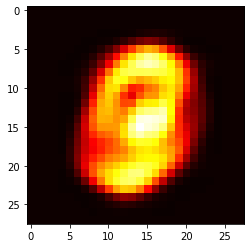

In [86]:
plt.imshow(np.sum(w1s, axis=(0,2)).reshape(28,28), cmap='hot')

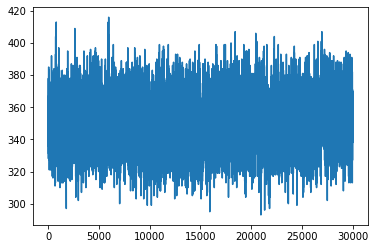

In [7]:
plt.plot(np.sum(w2s, axis=0).flatten())

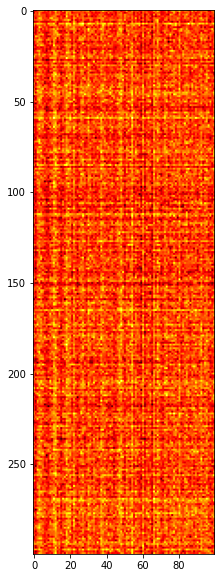

In [8]:
plt.figure(figsize=(7,10))
plt.imshow(np.sum(w2s, axis=0), cmap='hot')

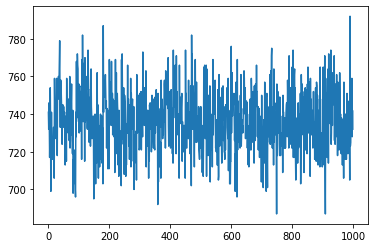

In [10]:
plt.plot(np.sum(w3s, axis=0).flatten())

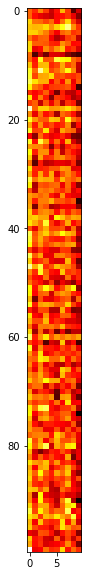

In [11]:
plt.figure(figsize=(7,10))
plt.imshow(np.sum(w3s, axis=0), cmap='hot')

In [59]:
ws_total = np.array([np.sum(w1s, axis=0), np.sum(w2s, axis=0), np.sum(w3s, axis=0)])
ws_total.shape

(3,)

In [5]:
total_elems = np.prod(np.sum(w1s, axis=0).shape) + np.prod(np.sum(w2s, axis=0).shape) + np.prod(np.sum(w3s, axis=0).shape)

In [6]:
total_elems

266200

In [89]:
threshold = 100
w1_thresholded = np.sum(w1s, axis=0) > threshold
w2_thresholded = np.sum(w2s, axis=0) > threshold
w3_thresholded = np.sum(w3s, axis=0) > threshold

In [90]:
(np.sum(w1_thresholded) + np.sum(w2_thresholded) + np.sum(w3_thresholded)) / total_elems

0.3566265965439519

In [91]:
np.sum(w1_thresholded)

63934

In [92]:
dicts[0]['b3']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [93]:
new_mask = {}
new_mask['b1'] = dicts[0]['b1']
new_mask['b2'] = dicts[0]['b2']
new_mask['b3'] = dicts[0]['b3']

new_mask['w1'] = w1_thresholded.astype(np.float32)
new_mask['w2'] = w2_thresholded.astype(np.float32)
new_mask['w3'] = w3_thresholded.astype(np.float32)

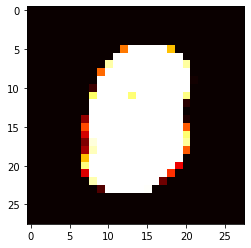

In [94]:
plt.imshow(np.sum(new_mask['w1'], axis=(1)).reshape(28,28), cmap='hot')

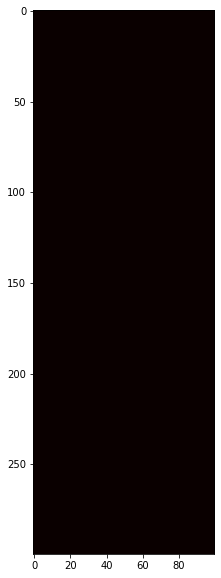

In [95]:
plt.figure(figsize=(7,10))
plt.imshow(new_mask['w2'], cmap='hot')

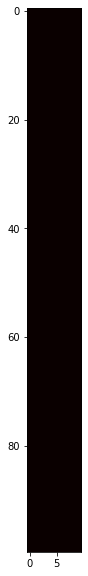

In [96]:
plt.figure(figsize=(7,10))
plt.imshow(new_mask['w3'], cmap='hot')

In [16]:
new_mask['w2']

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 1.]], dtype=float32)

In [17]:
dicts[0]['w2'].shape

(300, 100)

In [19]:
with open('masks_lenet300/threshold_330', 'wb') as f:
    pickle.dump(new_mask, f)

In [2]:
#0.9
train_avg_mask = 'itr100: (train/val) los:2.073/2.040 acc:0.330/0.250 spa:0.892 (t:0.6) \
itr200: (train/val) los:1.736/1.775 acc:0.450/0.380 spa:0.892 (t:0.5) \
itr300: (train/val) los:1.719/1.699 acc:0.400/0.470 spa:0.892 (t:0.5) \
itr400: (train/val) los:1.754/1.579 acc:0.350/0.500 spa:0.892 (t:0.5) \
itr500: (train/val) los:1.713/1.701 acc:0.440/0.450 spa:0.892 (t:0.5) \
itr600: (train/val) los:1.447/1.576 acc:0.510/0.480 spa:0.892 (t:0.5) \
itr700: (train/val) los:1.650/1.515 acc:0.430/0.440 spa:0.892 (t:0.5) \
itr800: (train/val) los:1.374/1.376 acc:0.550/0.530 spa:0.892 (t:0.5) \
itr900: (train/val) los:1.431/1.609 acc:0.530/0.390 spa:0.892 (t:0.5) \
itr1000: (train/val) los:1.754/1.536 acc:0.320/0.480 spa:0.892 (t:0.6) \
itr1100: (train/val) los:1.481/1.522 acc:0.470/0.420 spa:0.892 (t:0.6) \
itr1200: (train/val) los:1.495/1.348 acc:0.580/0.530 spa:0.892 (t:0.5) \
itr1300: (train/val) los:1.473/1.451 acc:0.470/0.500 spa:0.892 (t:0.6) \
itr1400: (train/val) los:1.493/1.382 acc:0.510/0.530 spa:0.892 (t:0.5) \
itr1500: (train/val) los:1.253/1.390 acc:0.610/0.540 spa:0.892 (t:0.5) \
itr1600: (train/val) los:1.627/1.426 acc:0.470/0.510 spa:0.892 (t:0.5) \
itr1700: (train/val) los:1.432/1.642 acc:0.500/0.380 spa:0.892 (t:0.5) \
itr1800: (train/val) los:1.558/1.321 acc:0.520/0.530 spa:0.892 (t:0.5) \
itr1900: (train/val) los:1.516/1.390 acc:0.430/0.520 spa:0.892 (t:0.5) \
itr2000: (train/val) los:1.282/1.376 acc:0.590/0.520 spa:0.892 (t:0.5) \
itr2100: (train/val) los:1.436/1.432 acc:0.570/0.500 spa:0.892 (t:0.5) \
itr2200: (train/val) los:1.283/1.336 acc:0.560/0.500 spa:0.892 (t:0.5) \
itr2300: (train/val) los:1.530/1.340 acc:0.420/0.570 spa:0.892 (t:0.5) \
itr2400: (train/val) los:1.219/1.310 acc:0.570/0.610 spa:0.892 (t:0.5) \
itr2500: (train/val) los:1.319/1.201 acc:0.510/0.550 spa:0.892 (t:0.5) \
itr2600: (train/val) los:1.332/1.320 acc:0.570/0.570 spa:0.892 (t:0.5) \
itr2700: (train/val) los:1.375/1.203 acc:0.570/0.580 spa:0.892 (t:0.5) \
itr2800: (train/val) los:1.278/1.211 acc:0.590/0.590 spa:0.892 (t:0.5) \
itr2900: (train/val) los:1.094/1.289 acc:0.630/0.610 spa:0.892 (t:0.5) \
itr3000: (train/val) los:1.325/1.239 acc:0.540/0.600 spa:0.892 (t:0.5) \
itr3100: (train/val) los:1.173/1.219 acc:0.600/0.600 spa:0.892 (t:0.6) \
itr3200: (train/val) los:1.234/1.024 acc:0.610/0.640 spa:0.892 (t:0.5) \
itr3300: (train/val) los:1.292/1.285 acc:0.540/0.610 spa:0.892 (t:0.5) \
itr3400: (train/val) los:1.266/1.308 acc:0.580/0.600 spa:0.892 (t:0.5) \
itr3500: (train/val) los:1.325/1.249 acc:0.570/0.610 spa:0.892 (t:0.5) \
itr3600: (train/val) los:1.273/1.478 acc:0.540/0.520 spa:0.892 (t:0.5) \
itr3700: (train/val) los:1.496/1.189 acc:0.480/0.610 spa:0.892 (t:0.5) \
itr3800: (train/val) los:1.278/1.112 acc:0.610/0.620 spa:0.892 (t:0.5) \
itr3900: (train/val) los:1.270/1.262 acc:0.590/0.570 spa:0.892 (t:0.5) \
itr4000: (train/val) los:1.141/1.107 acc:0.590/0.670 spa:0.892 (t:0.5) \
itr4100: (train/val) los:1.216/1.316 acc:0.570/0.570 spa:0.892 (t:0.5) \
itr4200: (train/val) los:1.259/1.109 acc:0.580/0.620 spa:0.892 (t:0.5) \
itr4300: (train/val) los:1.355/1.181 acc:0.580/0.590 spa:0.892 (t:0.5) \
itr4400: (train/val) los:1.164/1.320 acc:0.600/0.550 spa:0.892 (t:0.5) \
itr4500: (train/val) los:1.299/1.155 acc:0.590/0.610 spa:0.892 (t:0.5) \
itr4600: (train/val) los:1.159/1.452 acc:0.660/0.470 spa:0.892 (t:0.5) \
itr4700: (train/val) los:1.320/1.330 acc:0.510/0.580 spa:0.892 (t:0.5) \
itr4800: (train/val) los:1.183/1.189 acc:0.620/0.540 spa:0.892 (t:0.5) \
itr4900: (train/val) los:1.143/1.408 acc:0.610/0.580 spa:0.892 (t:0.5) \
itr5000: (train/val) los:1.331/1.225 acc:0.600/0.600 spa:0.892 (t:0.5)'


In [3]:
#0.9
train_random_mask = ['itr100: (train/val) los:0.551/0.502 acc:0.890/0.890 spa:0.900 (t:0.5)\
itr200: (train/val) los:0.465/0.491 acc:0.870/0.860 spa:0.900 (t:0.4)\
itr300: (train/val) los:0.444/0.549 acc:0.870/0.870 spa:0.900 (t:0.4)\
itr400: (train/val) los:0.391/0.312 acc:0.910/0.910 spa:0.900 (t:0.4)\
itr500: (train/val) los:0.305/0.400 acc:0.960/0.910 spa:0.900 (t:0.4)\
itr600: (train/val) los:0.593/0.222 acc:0.850/0.950 spa:0.900 (t:0.4)\
itr700: (train/val) los:0.182/0.283 acc:0.960/0.920 spa:0.900 (t:0.4)\
itr800: (train/val) los:0.216/0.351 acc:0.960/0.900 spa:0.900 (t:0.4)\
itr900: (train/val) los:0.244/0.380 acc:0.930/0.930 spa:0.900 (t:0.4)\
itr1000: (train/val) los:0.277/0.213 acc:0.920/0.980 spa:0.900 (t:0.4)\
itr1100: (train/val) los:0.144/0.185 acc:0.970/0.950 spa:0.900 (t:0.5)\
itr1200: (train/val) los:0.172/0.195 acc:0.940/0.960 spa:0.900 (t:0.4)\
itr1300: (train/val) los:0.123/0.199 acc:0.970/0.960 spa:0.900 (t:0.4)\
itr1400: (train/val) los:0.198/0.198 acc:0.940/0.950 spa:0.900 (t:0.4)\
itr1500: (train/val) los:0.152/0.191 acc:0.980/0.960 spa:0.900 (t:0.4)\
itr1600: (train/val) los:0.142/0.186 acc:0.960/0.960 spa:0.900 (t:0.4)\
itr1700: (train/val) los:0.128/0.196 acc:0.990/0.960 spa:0.900 (t:0.4)\
itr1800: (train/val) los:0.163/0.202 acc:0.960/0.930 spa:0.900 (t:0.4)\
itr1900: (train/val) los:0.102/0.256 acc:0.990/0.950 spa:0.900 (t:0.5)\
itr2000: (train/val) los:0.173/0.176 acc:0.960/0.960 spa:0.900 (t:0.5)\
itr2100: (train/val) los:0.141/0.279 acc:0.970/0.930 spa:0.900 (t:0.5)\
itr2200: (train/val) los:0.128/0.198 acc:0.960/0.970 spa:0.900 (t:0.5)\
itr2300: (train/val) los:0.167/0.137 acc:0.970/0.970 spa:0.900 (t:0.5)\
itr2400: (train/val) los:0.101/0.240 acc:0.970/0.950 spa:0.900 (t:0.5)\
itr2500: (train/val) los:0.114/0.160 acc:0.980/0.950 spa:0.900 (t:0.5)\
itr2600: (train/val) los:0.206/0.169 acc:0.960/0.980 spa:0.900 (t:0.5)\
itr2700: (train/val) los:0.120/0.162 acc:0.990/0.960 spa:0.900 (t:0.5)\
itr2800: (train/val) los:0.091/0.185 acc:0.980/0.940 spa:0.900 (t:0.5)\
itr2900: (train/val) los:0.252/0.098 acc:0.950/0.990 spa:0.900 (t:0.5)\
itr3000: (train/val) los:0.088/0.147 acc:0.990/0.970 spa:0.900 (t:0.5)\
itr3100: (train/val) los:0.159/0.211 acc:0.960/0.960 spa:0.900 (t:0.5)\
itr3200: (train/val) los:0.127/0.180 acc:0.970/0.940 spa:0.900 (t:0.5)\
itr3300: (train/val) los:0.152/0.154 acc:0.960/0.970 spa:0.900 (t:0.5)\
itr3400: (train/val) los:0.119/0.142 acc:0.980/0.980 spa:0.900 (t:0.5)\
itr3500: (train/val) los:0.112/0.131 acc:0.960/0.980 spa:0.900 (t:0.5)\
itr3600: (train/val) los:0.105/0.345 acc:0.990/0.940 spa:0.900 (t:0.5)\
itr3700: (train/val) los:0.076/0.103 acc:1.000/0.980 spa:0.900 (t:0.4)\
itr3800: (train/val) los:0.165/0.090 acc:0.970/0.990 spa:0.900 (t:0.4)\
itr3900: (train/val) los:0.155/0.100 acc:0.950/0.970 spa:0.900 (t:0.4)\
itr4000: (train/val) los:0.116/0.136 acc:0.990/0.960 spa:0.900 (t:0.5)\
itr4100: (train/val) los:0.107/0.125 acc:0.970/0.980 spa:0.900 (t:0.5)\
itr4200: (train/val) los:0.060/0.078 acc:1.000/0.990 spa:0.900 (t:0.5)\
itr4300: (train/val) los:0.229/0.066 acc:0.970/0.990 spa:0.900 (t:0.5)\
itr4400: (train/val) los:0.111/0.135 acc:0.980/0.980 spa:0.900 (t:0.5)\
itr4500: (train/val) los:0.088/0.098 acc:0.980/0.970 spa:0.900 (t:0.5)\
itr4600: (train/val) los:0.121/0.109 acc:0.970/0.970 spa:0.900 (t:0.5)\
itr4700: (train/val) los:0.097/0.363 acc:0.970/0.900 spa:0.900 (t:0.5)\
itr4800: (train/val) los:0.132/0.110 acc:0.970/0.980 spa:0.900 (t:0.5)\
itr4900: (train/val) los:0.060/0.174 acc:0.990/0.950 spa:0.900 (t:0.5)\
itr5000: (train/val) los:0.065/0.195 acc:1.000/0.940 spa:0.900 (t:0.4)',
                    
'itr100: (train/val) los:0.552/0.499 acc:0.880/0.900 spa:0.900 (t:0.5) \
itr200: (train/val) los:0.468/0.425 acc:0.860/0.880 spa:0.900 (t:0.4) \
itr300: (train/val) los:0.477/0.632 acc:0.870/0.840 spa:0.900 (t:0.4) \
itr400: (train/val) los:0.416/0.294 acc:0.890/0.910 spa:0.900 (t:0.4) \
itr500: (train/val) los:0.340/0.410 acc:0.900/0.890 spa:0.900 (t:0.4) \
itr600: (train/val) los:0.599/0.224 acc:0.860/0.940 spa:0.900 (t:0.4) \
itr700: (train/val) los:0.169/0.256 acc:0.950/0.930 spa:0.900 (t:0.4) \
itr800: (train/val) los:0.212/0.330 acc:0.970/0.890 spa:0.900 (t:0.4) \
itr900: (train/val) los:0.270/0.449 acc:0.910/0.920 spa:0.900 (t:0.4) \
itr1000: (train/val) los:0.244/0.184 acc:0.950/0.960 spa:0.900 (t:0.4) \
itr1100: (train/val) los:0.150/0.202 acc:0.960/0.950 spa:0.900 (t:0.5) \
itr1200: (train/val) los:0.158/0.212 acc:0.970/0.940 spa:0.900 (t:0.4) \
itr1300: (train/val) los:0.124/0.207 acc:0.970/0.960 spa:0.900 (t:0.4) \
itr1400: (train/val) los:0.190/0.189 acc:0.930/0.920 spa:0.900 (t:0.4) \
itr1500: (train/val) los:0.156/0.196 acc:0.960/0.960 spa:0.900 (t:0.4) \
itr1600: (train/val) los:0.153/0.200 acc:0.970/0.960 spa:0.900 (t:0.4) \
itr1700: (train/val) los:0.154/0.182 acc:0.960/0.980 spa:0.900 (t:0.5) \
itr1800: (train/val) los:0.150/0.198 acc:0.940/0.940 spa:0.900 (t:0.5) \
itr1900: (train/val) los:0.097/0.304 acc:0.990/0.920 spa:0.900 (t:0.5) \
itr2000: (train/val) los:0.155/0.157 acc:0.960/0.960 spa:0.900 (t:0.4) \
itr2100: (train/val) los:0.139/0.276 acc:0.970/0.950 spa:0.900 (t:0.5) \
itr2200: (train/val) los:0.129/0.171 acc:0.970/0.990 spa:0.900 (t:0.4) \
itr2300: (train/val) los:0.190/0.148 acc:0.960/0.960 spa:0.900 (t:0.4) \
itr2400: (train/val) los:0.131/0.249 acc:0.980/0.960 spa:0.900 (t:0.4) \
itr2500: (train/val) los:0.113/0.154 acc:0.970/0.950 spa:0.900 (t:0.4) \
itr2600: (train/val) los:0.181/0.136 acc:0.960/0.960 spa:0.900 (t:0.4) \
itr2700: (train/val) los:0.122/0.168 acc:0.980/0.960 spa:0.900 (t:0.4) \
itr2800: (train/val) los:0.104/0.236 acc:0.980/0.960 spa:0.900 (t:0.4) \
itr2900: (train/val) los:0.257/0.131 acc:0.950/0.980 spa:0.900 (t:0.4) \
itr3000: (train/val) los:0.088/0.141 acc:0.980/0.980 spa:0.900 (t:0.4) \
itr3100: (train/val) los:0.120/0.186 acc:0.980/0.960 spa:0.900 (t:0.5) \
itr3200: (train/val) los:0.108/0.131 acc:0.990/0.960 spa:0.900 (t:0.4) \
itr3300: (train/val) los:0.156/0.169 acc:0.980/0.970 spa:0.900 (t:0.4) \
itr3400: (train/val) los:0.103/0.181 acc:0.990/0.950 spa:0.900 (t:0.4) \
itr3500: (train/val) los:0.118/0.143 acc:0.970/0.970 spa:0.900 (t:0.5) \
itr3600: (train/val) los:0.103/0.300 acc:0.970/0.950 spa:0.900 (t:0.4) \
itr3700: (train/val) los:0.093/0.126 acc:0.990/0.980 spa:0.900 (t:0.4) \
itr3800: (train/val) los:0.146/0.086 acc:0.970/0.990 spa:0.900 (t:0.4) \
itr3900: (train/val) los:0.103/0.112 acc:0.970/0.980 spa:0.900 (t:0.4) \
itr4000: (train/val) los:0.128/0.132 acc:0.960/0.980 spa:0.900 (t:0.4) \
itr4100: (train/val) los:0.115/0.107 acc:0.960/0.990 spa:0.900 (t:0.5) \
itr4200: (train/val) los:0.071/0.090 acc:0.990/0.990 spa:0.900 (t:0.4) \
itr4300: (train/val) los:0.171/0.075 acc:0.960/0.990 spa:0.900 (t:0.4) \
itr4400: (train/val) los:0.117/0.125 acc:0.980/0.970 spa:0.900 (t:0.4) \
itr4500: (train/val) los:0.094/0.084 acc:0.960/0.990 spa:0.900 (t:0.5) \
itr4600: (train/val) los:0.118/0.121 acc:0.980/0.980 spa:0.900 (t:0.5) \
itr4700: (train/val) los:0.082/0.300 acc:0.990/0.920 spa:0.900 (t:0.5) \
itr4800: (train/val) los:0.149/0.123 acc:0.960/0.970 spa:0.900 (t:0.4) \
itr4900: (train/val) los:0.060/0.147 acc:1.000/0.980 spa:0.900 (t:0.5) \
itr5000: (train/val) los:0.068/0.167 acc:1.000/0.950 spa:0.900 (t:0.4)',\
'itr100: (train/val) los:0.557/0.473 acc:0.880/0.880 spa:0.900 (t:0.6) \
itr200: (train/val) los:0.459/0.428 acc:0.900/0.880 spa:0.900 (t:0.5) \
itr300: (train/val) los:0.459/0.609 acc:0.870/0.860 spa:0.900 (t:0.5) \
itr400: (train/val) los:0.381/0.357 acc:0.910/0.890 spa:0.900 (t:0.5) \
itr500: (train/val) los:0.326/0.400 acc:0.930/0.910 spa:0.900 (t:0.4) \
itr600: (train/val) los:0.533/0.235 acc:0.870/0.940 spa:0.900 (t:0.5) \
itr700: (train/val) los:0.184/0.240 acc:0.960/0.920 spa:0.900 (t:0.5) \
itr800: (train/val) los:0.193/0.343 acc:0.970/0.900 spa:0.900 (t:0.4) \
itr900: (train/val) los:0.264/0.415 acc:0.910/0.930 spa:0.900 (t:0.5) \
itr1000: (train/val) los:0.252/0.187 acc:0.940/0.980 spa:0.900 (t:0.4) \
itr1100: (train/val) los:0.184/0.189 acc:0.970/0.950 spa:0.900 (t:0.5) \
itr1200: (train/val) los:0.214/0.216 acc:0.920/0.950 spa:0.900 (t:0.4) \
itr1300: (train/val) los:0.125/0.221 acc:0.980/0.950 spa:0.900 (t:0.4) \
itr1400: (train/val) los:0.229/0.217 acc:0.940/0.940 spa:0.900 (t:0.5) \
itr1500: (train/val) los:0.176/0.155 acc:0.950/0.980 spa:0.900 (t:0.4) \
itr1600: (train/val) los:0.136/0.152 acc:0.980/0.960 spa:0.900 (t:0.4) \
itr1700: (train/val) los:0.130/0.224 acc:0.990/0.960 spa:0.900 (t:0.4) \
itr1800: (train/val) los:0.163/0.182 acc:0.940/0.940 spa:0.900 (t:0.5) \
itr1900: (train/val) los:0.131/0.288 acc:0.970/0.920 spa:0.900 (t:0.5) \
itr2000: (train/val) los:0.152/0.132 acc:0.950/0.960 spa:0.900 (t:0.4) \
itr2100: (train/val) los:0.149/0.244 acc:0.960/0.960 spa:0.900 (t:0.5) \
itr2200: (train/val) los:0.111/0.138 acc:0.980/0.980 spa:0.900 (t:0.4) \
itr2300: (train/val) los:0.180/0.155 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr2400: (train/val) los:0.104/0.246 acc:0.990/0.960 spa:0.900 (t:0.5) \
itr2500: (train/val) los:0.114/0.192 acc:0.960/0.950 spa:0.900 (t:0.5) \
itr2600: (train/val) los:0.164/0.139 acc:0.950/0.980 spa:0.900 (t:0.5) \
itr2700: (train/val) los:0.112/0.193 acc:0.980/0.960 spa:0.900 (t:0.5) \
itr2800: (train/val) los:0.073/0.262 acc:1.000/0.950 spa:0.900 (t:0.5) \
itr2900: (train/val) los:0.262/0.148 acc:0.940/0.980 spa:0.900 (t:0.4) \
itr3000: (train/val) los:0.092/0.139 acc:0.980/0.980 spa:0.900 (t:0.5) \
itr3100: (train/val) los:0.161/0.209 acc:0.970/0.930 spa:0.900 (t:0.5) \
itr3200: (train/val) los:0.119/0.125 acc:0.960/0.950 spa:0.900 (t:0.4) \
itr3300: (train/val) los:0.123/0.173 acc:0.960/0.950 spa:0.900 (t:0.4) \
itr3400: (train/val) los:0.123/0.182 acc:0.980/0.960 spa:0.900 (t:0.5) \
itr3500: (train/val) los:0.105/0.141 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr3600: (train/val) los:0.100/0.287 acc:0.980/0.940 spa:0.900 (t:0.5) \
itr3700: (train/val) los:0.099/0.118 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr3800: (train/val) los:0.134/0.103 acc:0.970/0.980 spa:0.900 (t:0.4) \
itr3900: (train/val) los:0.140/0.111 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr4000: (train/val) los:0.151/0.151 acc:0.960/0.980 spa:0.900 (t:0.4) \
itr4100: (train/val) los:0.108/0.110 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr4200: (train/val) los:0.061/0.090 acc:0.990/0.990 spa:0.900 (t:0.5) \
itr4300: (train/val) los:0.188/0.074 acc:0.970/0.990 spa:0.900 (t:0.4) \
itr4400: (train/val) los:0.126/0.121 acc:0.970/0.960 spa:0.900 (t:0.4) \
itr4500: (train/val) los:0.097/0.091 acc:0.970/0.980 spa:0.900 (t:0.4) \
itr4600: (train/val) los:0.140/0.108 acc:0.960/0.970 spa:0.900 (t:0.4) \
itr4700: (train/val) los:0.059/0.275 acc:1.000/0.910 spa:0.900 (t:0.5) \
itr4800: (train/val) los:0.135/0.091 acc:0.980/1.000 spa:0.900 (t:0.5) \
itr4900: (train/val) los:0.053/0.142 acc:1.000/0.970 spa:0.900 (t:0.4) \
itr5000: (train/val) los:0.071/0.158 acc:1.000/0.950 spa:0.900 (t:0.4)',\
'itr100: (train/val) los:0.541/0.414 acc:0.860/0.930 spa:0.900 (t:0.5) \
itr200: (train/val) los:0.406/0.442 acc:0.890/0.900 spa:0.900 (t:0.4) \
itr300: (train/val) los:0.442/0.547 acc:0.870/0.870 spa:0.900 (t:0.4) \
itr400: (train/val) los:0.387/0.308 acc:0.890/0.900 spa:0.900 (t:0.4) \
itr500: (train/val) los:0.255/0.366 acc:0.940/0.910 spa:0.900 (t:0.4) \
itr600: (train/val) los:0.557/0.221 acc:0.860/0.940 spa:0.900 (t:0.4) \
itr700: (train/val) los:0.152/0.277 acc:0.960/0.910 spa:0.900 (t:0.4) \
itr800: (train/val) los:0.234/0.335 acc:0.970/0.910 spa:0.900 (t:0.4) \
itr900: (train/val) los:0.257/0.422 acc:0.930/0.920 spa:0.900 (t:0.4) \
itr1000: (train/val) los:0.286/0.200 acc:0.930/0.940 spa:0.900 (t:0.4) \
itr1100: (train/val) los:0.156/0.205 acc:0.970/0.960 spa:0.900 (t:0.5) \
itr1200: (train/val) los:0.193/0.200 acc:0.920/0.950 spa:0.900 (t:0.4) \
itr1300: (train/val) los:0.117/0.240 acc:0.990/0.940 spa:0.900 (t:0.4) \
itr1400: (train/val) los:0.176/0.199 acc:0.950/0.950 spa:0.900 (t:0.4) \
itr1500: (train/val) los:0.152/0.187 acc:0.970/0.950 spa:0.900 (t:0.4) \
itr1600: (train/val) los:0.140/0.161 acc:0.950/0.970 spa:0.900 (t:0.4) \
itr1700: (train/val) los:0.137/0.227 acc:0.980/0.940 spa:0.900 (t:0.4) \
itr1800: (train/val) los:0.196/0.188 acc:0.930/0.940 spa:0.900 (t:0.4) \
itr1900: (train/val) los:0.138/0.280 acc:0.980/0.940 spa:0.900 (t:0.4) \
itr2000: (train/val) los:0.123/0.169 acc:0.990/0.950 spa:0.900 (t:0.4) \
itr2100: (train/val) los:0.146/0.253 acc:0.970/0.950 spa:0.900 (t:0.5) \
itr2200: (train/val) los:0.131/0.158 acc:0.990/0.990 spa:0.900 (t:0.4) \
itr2300: (train/val) los:0.174/0.158 acc:0.970/0.950 spa:0.900 (t:0.5) \
itr2400: (train/val) los:0.106/0.262 acc:0.980/0.970 spa:0.900 (t:0.4) \
itr2500: (train/val) los:0.150/0.142 acc:0.970/0.980 spa:0.900 (t:0.4) \
itr2600: (train/val) los:0.150/0.154 acc:0.980/0.970 spa:0.900 (t:0.4) \
itr2700: (train/val) los:0.123/0.172 acc:0.990/0.960 spa:0.900 (t:0.4) \
itr2800: (train/val) los:0.077/0.200 acc:1.000/0.950 spa:0.900 (t:0.5) \
itr2900: (train/val) los:0.235/0.123 acc:0.950/0.970 spa:0.900 (t:0.4) \
itr3000: (train/val) los:0.076/0.153 acc:0.980/0.960 spa:0.900 (t:0.4) \
itr3100: (train/val) los:0.160/0.221 acc:0.940/0.920 spa:0.900 (t:0.5) \
itr3200: (train/val) los:0.111/0.130 acc:0.980/0.980 spa:0.900 (t:0.4) \
itr3300: (train/val) los:0.141/0.126 acc:0.970/0.970 spa:0.900 (t:0.4) \
itr3400: (train/val) los:0.124/0.134 acc:0.980/0.970 spa:0.900 (t:0.4) \
itr3500: (train/val) los:0.133/0.180 acc:0.960/0.950 spa:0.900 (t:0.4) \
itr3600: (train/val) los:0.088/0.332 acc:0.990/0.950 spa:0.900 (t:0.4) \
itr3700: (train/val) los:0.104/0.128 acc:0.980/0.970 spa:0.900 (t:0.4) \
itr3800: (train/val) los:0.147/0.097 acc:0.980/0.980 spa:0.900 (t:0.4) \
itr3900: (train/val) los:0.110/0.100 acc:0.970/0.980 spa:0.900 (t:0.4) \
itr4000: (train/val) los:0.165/0.118 acc:0.960/0.970 spa:0.900 (t:0.4) \
itr4100: (train/val) los:0.120/0.107 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr4200: (train/val) los:0.056/0.118 acc:1.000/0.980 spa:0.900 (t:0.4) \
itr4300: (train/val) los:0.166/0.069 acc:0.970/1.000 spa:0.900 (t:0.4) \
itr4400: (train/val) los:0.106/0.089 acc:0.990/0.980 spa:0.900 (t:0.4) \
itr4500: (train/val) los:0.096/0.090 acc:0.980/0.980 spa:0.900 (t:0.4) \
itr4600: (train/val) los:0.111/0.111 acc:0.980/0.980 spa:0.900 (t:0.4) \
itr4700: (train/val) los:0.084/0.333 acc:0.990/0.920 spa:0.900 (t:0.4) \
itr4800: (train/val) los:0.135/0.103 acc:0.940/0.990 spa:0.900 (t:0.4) \
itr4900: (train/val) los:0.062/0.132 acc:0.990/0.950 spa:0.900 (t:0.4) \
itr5000: (train/val) los:0.063/0.199 acc:1.000/0.960 spa:0.900 (t:0.4)']

In [28]:
#0.64
train_avg_mask = 'itr100: (train/val) los:0.516/0.343 acc:0.860/0.950 spa:0.644 (t:0.6) \
itr200: (train/val) los:0.363/0.296 acc:0.900/0.950 spa:0.644 (t:0.5) \
itr300: (train/val) los:0.283/0.510 acc:0.920/0.900 spa:0.644 (t:0.5) \
itr400: (train/val) los:0.268/0.266 acc:0.960/0.950 spa:0.644 (t:0.5) \
itr500: (train/val) los:0.288/0.267 acc:0.940/0.930 spa:0.644 (t:0.5) \
itr600: (train/val) los:0.300/0.249 acc:0.930/0.960 spa:0.644 (t:0.5) \
itr700: (train/val) los:0.221/0.184 acc:0.970/0.970 spa:0.644 (t:0.5) \
itr800: (train/val) los:0.257/0.303 acc:0.950/0.930 spa:0.644 (t:0.5) \
itr900: (train/val) los:0.196/0.276 acc:0.980/0.940 spa:0.644 (t:0.5) \
itr1000: (train/val) los:0.252/0.227 acc:0.960/0.980 spa:0.644 (t:0.5) \
itr1100: (train/val) los:0.194/0.213 acc:0.990/0.950 spa:0.644 (t:0.5) \
itr1200: (train/val) los:0.213/0.180 acc:0.970/0.980 spa:0.644 (t:0.5) \
itr1300: (train/val) los:0.230/0.233 acc:0.950/0.960 spa:0.644 (t:0.5) \
itr1400: (train/val) los:0.268/0.183 acc:0.940/0.960 spa:0.644 (t:0.5) \
itr1500: (train/val) los:0.158/0.194 acc:0.990/0.960 spa:0.644 (t:0.5) \
itr1600: (train/val) los:0.206/0.169 acc:0.970/0.970 spa:0.644 (t:0.5) \
itr1700: (train/val) los:0.251/0.195 acc:0.980/0.970 spa:0.644 (t:0.5) \
itr1800: (train/val) los:0.159/0.187 acc:0.980/0.970 spa:0.644 (t:0.5) \
itr1900: (train/val) los:0.201/0.260 acc:0.970/0.930 spa:0.644 (t:0.5) \
itr2000: (train/val) los:0.127/0.206 acc:0.990/0.980 spa:0.644 (t:0.5) \
itr2100: (train/val) los:0.176/0.249 acc:0.970/0.940 spa:0.644 (t:0.5) \
itr2200: (train/val) los:0.133/0.239 acc:0.990/0.970 spa:0.644 (t:0.5) \
itr2300: (train/val) los:0.157/0.155 acc:0.970/0.980 spa:0.644 (t:0.5) \
itr2400: (train/val) los:0.183/0.279 acc:0.960/0.960 spa:0.644 (t:0.5) \
itr2500: (train/val) los:0.126/0.179 acc:0.990/0.980 spa:0.644 (t:0.5) \
itr2600: (train/val) los:0.193/0.182 acc:0.960/0.970 spa:0.644 (t:0.5) \
itr2700: (train/val) los:0.160/0.145 acc:0.980/0.970 spa:0.644 (t:0.5) \
itr2800: (train/val) los:0.136/0.247 acc:0.980/0.940 spa:0.644 (t:0.5) \
itr2900: (train/val) los:0.127/0.210 acc:0.980/0.970 spa:0.644 (t:0.5) \
itr3000: (train/val) los:0.142/0.185 acc:0.980/0.970 spa:0.644 (t:0.5) \
itr3100: (train/val) los:0.129/0.218 acc:0.980/0.960 spa:0.644 (t:0.5) \
itr3200: (train/val) los:0.134/0.175 acc:0.990/0.970 spa:0.644 (t:0.5) \
itr3300: (train/val) los:0.119/0.183 acc:0.990/0.970 spa:0.644 (t:0.5) \
itr3400: (train/val) los:0.131/0.190 acc:0.990/0.970 spa:0.644 (t:0.5) \
itr3500: (train/val) los:0.140/0.197 acc:0.990/0.990 spa:0.644 (t:0.5) \
itr3600: (train/val) los:0.150/0.362 acc:0.980/0.970 spa:0.644 (t:0.5) \
itr3700: (train/val) los:0.148/0.116 acc:0.960/1.000 spa:0.644 (t:0.5) \
itr3800: (train/val) los:0.141/0.148 acc:0.980/0.970 spa:0.644 (t:0.5) \
itr3900: (train/val) los:0.104/0.124 acc:1.000/1.000 spa:0.644 (t:0.5) \
itr4000: (train/val) los:0.102/0.184 acc:1.000/0.970 spa:0.644 (t:0.5) \
itr4100: (train/val) los:0.142/0.171 acc:0.990/0.980 spa:0.644 (t:0.6) \
itr4200: (train/val) los:0.137/0.129 acc:0.990/0.980 spa:0.644 (t:0.5) \
itr4300: (train/val) los:0.102/0.106 acc:1.000/1.000 spa:0.644 (t:0.5) \
itr4400: (train/val) los:0.128/0.126 acc:0.990/0.990 spa:0.644 (t:0.5) \
itr4500: (train/val) los:0.110/0.162 acc:1.000/0.970 spa:0.644 (t:0.5) \
itr4600: (train/val) los:0.112/0.148 acc:1.000/0.990 spa:0.644 (t:0.5) \
itr4700: (train/val) los:0.126/0.339 acc:0.990/0.930 spa:0.644 (t:0.5) \
itr4800: (train/val) los:0.107/0.153 acc:1.000/0.970 spa:0.644 (t:0.5) \
itr4900: (train/val) los:0.102/0.191 acc:1.000/0.960 spa:0.644 (t:0.5) \
itr5000: (train/val) los:0.124/0.212 acc:0.990/0.940 spa:0.644 (t:0.5)'


In [36]:
#0.64
train_random_mask = ['itr100: (train/val) los:0.427/0.339 acc:0.910/0.910 spa:0.640 (t:0.6) \
itr200: (train/val) los:0.383/0.319 acc:0.940/0.920 spa:0.640 (t:0.5) \
itr300: (train/val) los:0.333/0.454 acc:0.890/0.910 spa:0.640 (t:0.5) \
itr400: (train/val) los:0.309/0.277 acc:0.940/0.930 spa:0.640 (t:0.5) \
itr500: (train/val) los:0.234/0.300 acc:0.950/0.920 spa:0.640 (t:0.5) \
itr600: (train/val) los:0.447/0.199 acc:0.850/0.960 spa:0.640 (t:0.5) \
itr700: (train/val) los:0.148/0.204 acc:0.990/0.950 spa:0.640 (t:0.5) \
itr800: (train/val) los:0.150/0.319 acc:0.990/0.930 spa:0.640 (t:0.5) \
itr900: (train/val) los:0.255/0.300 acc:0.930/0.950 spa:0.640 (t:0.5) \
itr1000: (train/val) los:0.223/0.222 acc:0.960/0.980 spa:0.640 (t:0.5) \
itr1100: (train/val) los:0.174/0.207 acc:0.970/0.960 spa:0.640 (t:0.6) \
itr1200: (train/val) los:0.160/0.182 acc:0.980/0.970 spa:0.640 (t:0.5) \
itr1300: (train/val) los:0.134/0.191 acc:0.980/0.980 spa:0.640 (t:0.5) \
itr1400: (train/val) los:0.202/0.210 acc:0.950/0.960 spa:0.640 (t:0.5) \
itr1500: (train/val) los:0.148/0.218 acc:0.980/0.950 spa:0.640 (t:0.5) \
itr1600: (train/val) los:0.121/0.170 acc:1.000/0.970 spa:0.640 (t:0.5) \
itr1700: (train/val) los:0.157/0.204 acc:0.990/0.950 spa:0.640 (t:0.5) \
itr1800: (train/val) los:0.158/0.161 acc:0.980/0.990 spa:0.640 (t:0.5) \
itr1900: (train/val) los:0.110/0.247 acc:1.000/0.970 spa:0.640 (t:0.5) \
itr2000: (train/val) los:0.160/0.209 acc:0.970/0.970 spa:0.640 (t:0.5) \
itr2100: (train/val) los:0.129/0.256 acc:0.980/0.960 spa:0.640 (t:0.5) \
itr2200: (train/val) los:0.117/0.170 acc:1.000/0.980 spa:0.640 (t:0.5) \
itr2300: (train/val) los:0.131/0.156 acc:0.990/0.970 spa:0.640 (t:0.5) \
itr2400: (train/val) los:0.119/0.252 acc:0.990/0.950 spa:0.640 (t:0.5) \
itr2500: (train/val) los:0.135/0.125 acc:0.980/0.990 spa:0.640 (t:0.5) \
itr2600: (train/val) los:0.170/0.205 acc:0.990/0.960 spa:0.640 (t:0.5) \
itr2700: (train/val) los:0.122/0.207 acc:0.990/0.960 spa:0.640 (t:0.5) \
itr2800: (train/val) los:0.097/0.221 acc:1.000/0.950 spa:0.640 (t:0.5) \
itr2900: (train/val) los:0.242/0.158 acc:0.960/0.980 spa:0.640 (t:0.5) \
itr3000: (train/val) los:0.123/0.181 acc:0.980/0.960 spa:0.640 (t:0.5) \
itr3100: (train/val) los:0.137/0.225 acc:0.980/0.970 spa:0.640 (t:0.6) \
itr3200: (train/val) los:0.130/0.151 acc:0.980/0.980 spa:0.640 (t:0.5) \
itr3300: (train/val) los:0.128/0.179 acc:0.990/0.970 spa:0.640 (t:0.7) \
itr3400: (train/val) los:0.097/0.138 acc:1.000/0.990 spa:0.640 (t:0.6) \
itr3500: (train/val) los:0.127/0.165 acc:0.980/0.960 spa:0.640 (t:0.6) \
itr3600: (train/val) los:0.104/0.315 acc:1.000/0.950 spa:0.640 (t:0.6) \
itr3700: (train/val) los:0.108/0.130 acc:0.990/0.980 spa:0.640 (t:0.6) \
itr3800: (train/val) los:0.140/0.101 acc:0.970/1.000 spa:0.640 (t:0.7) \
itr3900: (train/val) los:0.142/0.107 acc:0.960/1.000 spa:0.640 (t:0.6) \
itr4000: (train/val) los:0.111/0.144 acc:0.990/0.980 spa:0.640 (t:0.7) \
itr4100: (train/val) los:0.124/0.138 acc:0.980/0.980 spa:0.640 (t:0.6) \
itr4200: (train/val) los:0.091/0.103 acc:1.000/0.990 spa:0.640 (t:0.6) \
itr4300: (train/val) los:0.127/0.090 acc:0.980/1.000 spa:0.640 (t:0.5) \
itr4400: (train/val) los:0.124/0.129 acc:0.990/0.980 spa:0.640 (t:0.5) \
itr4500: (train/val) los:0.099/0.108 acc:1.000/0.990 spa:0.640 (t:0.5) \
itr4600: (train/val) los:0.103/0.133 acc:0.990/0.980 spa:0.640 (t:0.6) \
itr4700: (train/val) los:0.091/0.344 acc:1.000/0.920 spa:0.640 (t:0.6) \
itr4800: (train/val) los:0.138/0.103 acc:0.980/1.000 spa:0.640 (t:0.6) \
itr4900: (train/val) los:0.087/0.144 acc:1.000/0.970 spa:0.640 (t:0.6) \
itr5000: (train/val) los:0.082/0.239 acc:1.000/0.950 spa:0.640 (t:0.5)', \
'itr100: (train/val) los:0.466/0.358 acc:0.890/0.910 spa:0.640 (t:0.8) \
itr200: (train/val) los:0.346/0.292 acc:0.920/0.930 spa:0.640 (t:0.6) \
itr300: (train/val) los:0.315/0.484 acc:0.900/0.910 spa:0.640 (t:0.7) \
itr400: (train/val) los:0.297/0.326 acc:0.930/0.910 spa:0.640 (t:0.6) \
itr500: (train/val) los:0.225/0.332 acc:0.950/0.920 spa:0.640 (t:0.5) \
itr600: (train/val) los:0.429/0.191 acc:0.890/0.970 spa:0.640 (t:0.5) \
itr700: (train/val) los:0.150/0.249 acc:0.980/0.930 spa:0.640 (t:0.5) \
itr800: (train/val) los:0.174/0.300 acc:0.980/0.930 spa:0.640 (t:0.5) \
itr900: (train/val) los:0.241/0.393 acc:0.960/0.930 spa:0.640 (t:0.6) \
itr1000: (train/val) los:0.238/0.222 acc:0.930/0.970 spa:0.640 (t:0.6) \
itr1100: (train/val) los:0.188/0.200 acc:0.970/0.970 spa:0.640 (t:0.6) \
itr1200: (train/val) los:0.154/0.200 acc:0.980/0.950 spa:0.640 (t:0.6) \
itr1300: (train/val) los:0.149/0.189 acc:0.980/0.970 spa:0.640 (t:0.5) \
itr1400: (train/val) los:0.182/0.156 acc:0.960/0.970 spa:0.640 (t:0.5) \
itr1500: (train/val) los:0.148/0.188 acc:1.000/0.960 spa:0.640 (t:0.5) \
itr1600: (train/val) los:0.129/0.151 acc:0.990/0.980 spa:0.640 (t:0.5) \
itr1700: (train/val) los:0.151/0.179 acc:0.990/0.970 spa:0.640 (t:0.5) \
itr1800: (train/val) los:0.159/0.166 acc:0.960/0.970 spa:0.640 (t:0.5) \
itr1900: (train/val) los:0.112/0.241 acc:1.000/0.940 spa:0.640 (t:0.5) \
itr2000: (train/val) los:0.143/0.228 acc:0.980/0.960 spa:0.640 (t:0.5) \
itr2100: (train/val) los:0.134/0.268 acc:0.990/0.970 spa:0.640 (t:0.6) \
itr2200: (train/val) los:0.120/0.170 acc:0.980/0.980 spa:0.640 (t:0.5) \
itr2300: (train/val) los:0.139/0.183 acc:1.000/0.970 spa:0.640 (t:0.5) \
itr2400: (train/val) los:0.115/0.222 acc:0.990/0.960 spa:0.640 (t:0.5) \
itr2500: (train/val) los:0.124/0.126 acc:1.000/0.990 spa:0.640 (t:0.5) \
itr2600: (train/val) los:0.168/0.168 acc:0.980/0.980 spa:0.640 (t:0.5) \
itr2700: (train/val) los:0.134/0.161 acc:0.980/0.970 spa:0.640 (t:0.6) \
itr2800: (train/val) los:0.100/0.206 acc:1.000/0.970 spa:0.640 (t:0.6) \
itr2900: (train/val) los:0.199/0.156 acc:0.960/0.990 spa:0.640 (t:0.6) \
itr3000: (train/val) los:0.127/0.162 acc:0.990/0.960 spa:0.640 (t:0.6) \
itr3100: (train/val) los:0.137/0.230 acc:0.980/0.960 spa:0.640 (t:0.6) \
itr3200: (train/val) los:0.117/0.156 acc:0.990/0.970 spa:0.640 (t:0.5) \
itr3300: (train/val) los:0.114/0.205 acc:0.990/0.970 spa:0.640 (t:0.5) \
itr3400: (train/val) los:0.110/0.116 acc:0.990/0.980 spa:0.640 (t:0.5) \
itr3500: (train/val) los:0.114/0.160 acc:0.990/0.980 spa:0.640 (t:0.5) \
itr3600: (train/val) los:0.110/0.339 acc:0.990/0.960 spa:0.640 (t:0.5) \
itr3700: (train/val) los:0.110/0.108 acc:0.990/0.990 spa:0.640 (t:0.5) \
itr3800: (train/val) los:0.126/0.098 acc:0.980/1.000 spa:0.640 (t:0.5) \
itr3900: (train/val) los:0.147/0.119 acc:0.970/0.990 spa:0.640 (t:0.5) \
itr4000: (train/val) los:0.132/0.142 acc:0.990/0.980 spa:0.640 (t:0.5) \
itr4100: (train/val) los:0.116/0.113 acc:0.990/0.980 spa:0.640 (t:0.6) \
itr4200: (train/val) los:0.091/0.113 acc:1.000/0.980 spa:0.640 (t:0.5) \
itr4300: (train/val) los:0.153/0.093 acc:0.980/1.000 spa:0.640 (t:0.5) \
itr4400: (train/val) los:0.104/0.104 acc:1.000/0.990 spa:0.640 (t:0.5) \
itr4500: (train/val) los:0.095/0.116 acc:1.000/0.990 spa:0.640 (t:0.5) \
itr4600: (train/val) los:0.102/0.114 acc:1.000/0.990 spa:0.640 (t:0.6) \
itr4700: (train/val) los:0.101/0.289 acc:0.990/0.920 spa:0.640 (t:0.6) \
itr4800: (train/val) los:0.112/0.109 acc:1.000/0.990 spa:0.640 (t:0.6) \
itr4900: (train/val) los:0.083/0.175 acc:1.000/0.970 spa:0.640 (t:0.6) \
itr5000: (train/val) los:0.085/0.157 acc:1.000/0.980 spa:0.640 (t:0.6)',
                    'itr100: (train/val) los:0.481/0.371 acc:0.890/0.920 spa:0.640 (t:0.7) \
itr200: (train/val) los:0.376/0.314 acc:0.900/0.910 spa:0.640 (t:0.5) \
itr300: (train/val) los:0.327/0.408 acc:0.920/0.910 spa:0.640 (t:0.5) \
itr400: (train/val) los:0.344/0.265 acc:0.920/0.930 spa:0.640 (t:0.5) \
itr500: (train/val) los:0.245/0.368 acc:0.930/0.900 spa:0.640 (t:0.5) \
itr600: (train/val) los:0.468/0.195 acc:0.860/0.970 spa:0.640 (t:0.5) \
itr700: (train/val) los:0.166/0.239 acc:0.980/0.920 spa:0.640 (t:0.5) \
itr800: (train/val) los:0.162/0.285 acc:0.980/0.930 spa:0.640 (t:0.5) \
itr900: (train/val) los:0.238/0.367 acc:0.960/0.940 spa:0.640 (t:0.5) \
itr1000: (train/val) los:0.222/0.231 acc:0.960/0.950 spa:0.640 (t:0.5) \
itr1100: (train/val) los:0.198/0.187 acc:0.970/0.970 spa:0.640 (t:0.6) \
itr1200: (train/val) los:0.174/0.179 acc:0.970/0.970 spa:0.640 (t:0.5) \
itr1300: (train/val) los:0.140/0.250 acc:0.980/0.940 spa:0.640 (t:0.5) \
itr1400: (train/val) los:0.189/0.185 acc:0.960/0.960 spa:0.640 (t:0.5) \
itr1500: (train/val) los:0.161/0.185 acc:0.980/0.950 spa:0.640 (t:0.5) \
itr1600: (train/val) los:0.139/0.140 acc:0.980/0.980 spa:0.640 (t:0.5) \
itr1700: (train/val) los:0.154/0.198 acc:0.990/0.940 spa:0.640 (t:0.5) \
itr1800: (train/val) los:0.149/0.178 acc:0.990/0.970 spa:0.640 (t:0.5) \
itr1900: (train/val) los:0.106/0.244 acc:1.000/0.970 spa:0.640 (t:0.5) \
itr2000: (train/val) los:0.150/0.204 acc:0.990/0.980 spa:0.640 (t:0.5) \
itr2100: (train/val) los:0.128/0.249 acc:0.990/0.970 spa:0.640 (t:0.6) \
itr2200: (train/val) los:0.126/0.176 acc:1.000/0.980 spa:0.640 (t:0.5) \
itr2300: (train/val) los:0.124/0.149 acc:0.990/0.980 spa:0.640 (t:0.5) \
itr2400: (train/val) los:0.119/0.248 acc:0.990/0.960 spa:0.640 (t:0.5) \
itr2500: (train/val) los:0.121/0.144 acc:0.990/0.960 spa:0.640 (t:0.5) \
itr2600: (train/val) los:0.175/0.206 acc:0.970/0.970 spa:0.640 (t:0.5) \
itr2700: (train/val) los:0.119/0.171 acc:0.990/0.970 spa:0.640 (t:0.5) \
itr2800: (train/val) los:0.101/0.181 acc:1.000/0.970 spa:0.640 (t:0.5) \
itr2900: (train/val) los:0.203/0.172 acc:0.970/0.990 spa:0.640 (t:0.5) \
itr3000: (train/val) los:0.120/0.156 acc:0.990/0.980 spa:0.640 (t:0.5) \
itr3100: (train/val) los:0.137/0.205 acc:0.980/0.970 spa:0.640 (t:0.6) \
itr3200: (train/val) los:0.110/0.153 acc:0.990/0.970 spa:0.640 (t:0.5) \
itr3300: (train/val) los:0.131/0.180 acc:0.970/0.960 spa:0.640 (t:0.5) \
itr3400: (train/val) los:0.108/0.132 acc:0.980/0.980 spa:0.640 (t:0.5) \
itr3500: (train/val) los:0.105/0.182 acc:1.000/0.960 spa:0.640 (t:0.5) \
itr3600: (train/val) los:0.109/0.325 acc:1.000/0.960 spa:0.640 (t:0.5) \
itr3700: (train/val) los:0.111/0.145 acc:1.000/0.990 spa:0.640 (t:0.5) \
itr3800: (train/val) los:0.137/0.117 acc:0.980/0.990 spa:0.640 (t:0.5) \
itr3900: (train/val) los:0.145/0.112 acc:0.990/1.000 spa:0.640 (t:0.5) \
itr4000: (train/val) los:0.127/0.152 acc:0.990/0.980 spa:0.640 (t:0.5) \
itr4100: (train/val) los:0.111/0.133 acc:0.990/0.990 spa:0.640 (t:0.6) \
itr4200: (train/val) los:0.089/0.113 acc:1.000/0.990 spa:0.640 (t:0.5) \
itr4300: (train/val) los:0.168/0.096 acc:0.980/1.000 spa:0.640 (t:0.5) \
itr4400: (train/val) los:0.104/0.123 acc:1.000/0.990 spa:0.640 (t:0.5) \
itr4500: (train/val) los:0.107/0.111 acc:1.000/0.980 spa:0.640 (t:0.5) \
itr4600: (train/val) los:0.100/0.138 acc:1.000/0.970 spa:0.640 (t:0.5) \
itr4700: (train/val) los:0.107/0.343 acc:0.990/0.930 spa:0.640 (t:0.5) \
itr4800: (train/val) los:0.103/0.124 acc:1.000/0.990 spa:0.640 (t:0.5) \
itr4900: (train/val) los:0.084/0.142 acc:1.000/0.980 spa:0.640 (t:0.5) \
itr5000: (train/val) los:0.084/0.168 acc:1.000/0.950 spa:0.640 (t:0.5)']

In [4]:
#0.9, absolute random
train_random_mask1=['itr100: (train/val) los:2.112/2.093 acc:0.300/0.360 spa:0.900 (t:0.6) \
itr200: (train/val) los:1.282/1.240 acc:0.570/0.660 spa:0.900 (t:0.5) \
itr300: (train/val) los:0.541/0.745 acc:0.840/0.810 spa:0.900 (t:0.5) \
itr400: (train/val) los:0.345/0.482 acc:0.940/0.870 spa:0.900 (t:0.5) \
itr500: (train/val) los:0.458/0.496 acc:0.860/0.850 spa:0.900 (t:0.5) \
itr600: (train/val) los:0.419/0.372 acc:0.880/0.880 spa:0.900 (t:0.5) \
itr700: (train/val) los:0.336/0.379 acc:0.930/0.900 spa:0.900 (t:0.5) \
itr800: (train/val) los:0.269/0.430 acc:0.920/0.880 spa:0.900 (t:0.5) \
itr900: (train/val) los:0.296/0.466 acc:0.930/0.910 spa:0.900 (t:0.5) \
itr1000: (train/val) los:0.351/0.283 acc:0.890/0.940 spa:0.900 (t:0.5) \
itr1100: (train/val) los:0.369/0.261 acc:0.920/0.930 spa:0.900 (t:0.7) \
itr1200: (train/val) los:0.314/0.245 acc:0.930/0.940 spa:0.900 (t:0.6) \
itr1300: (train/val) los:0.343/0.399 acc:0.920/0.910 spa:0.900 (t:0.7) \
itr1400: (train/val) los:0.262/0.263 acc:0.950/0.940 spa:0.900 (t:0.6) \
itr1500: (train/val) los:0.218/0.243 acc:0.950/0.930 spa:0.900 (t:0.6) \
itr1600: (train/val) los:0.314/0.248 acc:0.910/0.940 spa:0.900 (t:0.6) \
itr1700: (train/val) los:0.362/0.291 acc:0.930/0.930 spa:0.900 (t:0.5) \
itr1800: (train/val) los:0.222/0.303 acc:0.940/0.920 spa:0.900 (t:0.6) \
itr1900: (train/val) los:0.428/0.388 acc:0.890/0.920 spa:0.900 (t:0.6) \
itr2000: (train/val) los:0.152/0.259 acc:0.970/0.950 spa:0.900 (t:0.6) \
itr2100: (train/val) los:0.328/0.300 acc:0.920/0.920 spa:0.900 (t:0.6) \
itr2200: (train/val) los:0.244/0.245 acc:0.930/0.970 spa:0.900 (t:0.5) \
itr2300: (train/val) los:0.234/0.247 acc:0.910/0.940 spa:0.900 (t:0.5) \
itr2400: (train/val) los:0.278/0.322 acc:0.940/0.950 spa:0.900 (t:0.5) \
itr2500: (train/val) los:0.178/0.269 acc:0.940/0.930 spa:0.900 (t:0.5) \
itr2600: (train/val) los:0.308/0.252 acc:0.950/0.950 spa:0.900 (t:0.5) \
itr2700: (train/val) los:0.224/0.239 acc:0.940/0.930 spa:0.900 (t:0.6) \
itr2800: (train/val) los:0.222/0.273 acc:0.930/0.910 spa:0.900 (t:0.6) \
itr2900: (train/val) los:0.197/0.169 acc:0.950/0.990 spa:0.900 (t:0.6) \
itr3000: (train/val) los:0.176/0.257 acc:0.950/0.930 spa:0.900 (t:0.7) \
itr3100: (train/val) los:0.121/0.286 acc:0.980/0.940 spa:0.900 (t:0.8) \
itr3200: (train/val) los:0.242/0.161 acc:0.960/0.970 spa:0.900 (t:0.8) \
itr3300: (train/val) los:0.179/0.215 acc:0.950/0.960 spa:0.900 (t:0.8) \
itr3400: (train/val) los:0.186/0.264 acc:0.990/0.930 spa:0.900 (t:0.8) \
itr3500: (train/val) los:0.211/0.199 acc:0.950/0.950 spa:0.900 (t:0.8) \
itr3600: (train/val) los:0.231/0.342 acc:0.940/0.950 spa:0.900 (t:0.5) \
itr3700: (train/val) los:0.208/0.166 acc:0.950/0.960 spa:0.900 (t:0.5) \
itr3800: (train/val) los:0.211/0.156 acc:0.960/0.970 spa:0.900 (t:0.5) \
itr3900: (train/val) los:0.144/0.199 acc:0.990/0.950 spa:0.900 (t:0.5) \
itr4000: (train/val) los:0.111/0.171 acc:0.980/0.970 spa:0.900 (t:0.5) \
itr4100: (train/val) los:0.219/0.188 acc:0.950/0.950 spa:0.900 (t:0.6) \
itr4200: (train/val) los:0.152/0.122 acc:0.980/0.980 spa:0.900 (t:0.5) \
itr4300: (train/val) los:0.115/0.124 acc:0.990/0.980 spa:0.900 (t:0.5) \
itr4400: (train/val) los:0.213/0.132 acc:0.970/0.980 spa:0.900 (t:0.5) \
itr4500: (train/val) los:0.276/0.197 acc:0.940/0.950 spa:0.900 (t:0.6) \
itr4600: (train/val) los:0.177/0.168 acc:0.960/0.970 spa:0.900 (t:0.6) \
itr4700: (train/val) los:0.228/0.284 acc:0.950/0.910 spa:0.900 (t:0.6) \
itr4800: (train/val) los:0.181/0.175 acc:0.960/0.960 spa:0.900 (t:0.5) \
itr4900: (train/val) los:0.237/0.204 acc:0.940/0.950 spa:0.900 (t:0.5) \
itr5000: (train/val) los:0.176/0.323 acc:0.960/0.920 spa:0.900 (t:0.7)',
                  
                  'itr100: (train/val) los:1.835/1.784 acc:0.530/0.530 spa:0.901 (t:0.6) \
itr200: (train/val) los:0.727/0.704 acc:0.830/0.900 spa:0.901 (t:0.5) \
itr300: (train/val) los:0.444/0.687 acc:0.880/0.810 spa:0.901 (t:0.5) \
itr400: (train/val) los:0.309/0.439 acc:0.920/0.890 spa:0.901 (t:0.5) \
itr500: (train/val) los:0.415/0.517 acc:0.880/0.880 spa:0.901 (t:0.5) \
itr600: (train/val) los:0.372/0.313 acc:0.900/0.920 spa:0.901 (t:0.6) \
itr700: (train/val) los:0.364/0.398 acc:0.910/0.880 spa:0.901 (t:0.5) \
itr800: (train/val) los:0.272/0.468 acc:0.940/0.840 spa:0.901 (t:0.5) \
itr900: (train/val) los:0.316/0.523 acc:0.950/0.890 spa:0.901 (t:0.5) \
itr1000: (train/val) los:0.370/0.274 acc:0.890/0.940 spa:0.901 (t:0.5) \
itr1100: (train/val) los:0.334/0.304 acc:0.910/0.920 spa:0.901 (t:0.6) \
itr1200: (train/val) los:0.338/0.296 acc:0.910/0.940 spa:0.901 (t:0.5) \
itr1300: (train/val) los:0.373/0.364 acc:0.930/0.880 spa:0.901 (t:0.5) \
itr1400: (train/val) los:0.282/0.296 acc:0.920/0.920 spa:0.901 (t:0.5) \
itr1500: (train/val) los:0.255/0.236 acc:0.920/0.910 spa:0.901 (t:0.5) \
itr1600: (train/val) los:0.320/0.217 acc:0.930/0.960 spa:0.901 (t:0.6) \
itr1700: (train/val) los:0.353/0.274 acc:0.950/0.960 spa:0.901 (t:0.6) \
itr1800: (train/val) los:0.187/0.327 acc:0.960/0.920 spa:0.901 (t:0.6) \
itr1900: (train/val) los:0.395/0.405 acc:0.920/0.900 spa:0.901 (t:0.5) \
itr2000: (train/val) los:0.154/0.250 acc:0.970/0.930 spa:0.901 (t:0.5) \
itr2100: (train/val) los:0.312/0.292 acc:0.930/0.950 spa:0.901 (t:0.6) \
itr2200: (train/val) los:0.197/0.233 acc:0.950/0.960 spa:0.901 (t:0.6) \
itr2300: (train/val) los:0.205/0.198 acc:0.940/0.950 spa:0.901 (t:0.6) \
itr2400: (train/val) los:0.309/0.356 acc:0.940/0.940 spa:0.901 (t:0.6) \
itr2500: (train/val) los:0.200/0.208 acc:0.960/0.940 spa:0.901 (t:0.6) \
itr2600: (train/val) los:0.324/0.201 acc:0.960/0.980 spa:0.901 (t:0.6) \
itr2700: (train/val) los:0.217/0.250 acc:0.940/0.920 spa:0.901 (t:0.6) \
itr2800: (train/val) los:0.266/0.253 acc:0.920/0.930 spa:0.901 (t:0.6) \
itr2900: (train/val) los:0.197/0.137 acc:0.950/0.980 spa:0.901 (t:0.6) \
itr3000: (train/val) los:0.148/0.236 acc:0.970/0.960 spa:0.901 (t:0.5) \
itr3100: (train/val) los:0.144/0.330 acc:0.970/0.930 spa:0.901 (t:0.6) \
itr3200: (train/val) los:0.253/0.188 acc:0.970/0.960 spa:0.901 (t:0.6) \
itr3300: (train/val) los:0.210/0.230 acc:0.950/0.930 spa:0.901 (t:0.7) \
itr3400: (train/val) los:0.206/0.230 acc:0.990/0.960 spa:0.901 (t:0.7) \
itr3500: (train/val) los:0.193/0.193 acc:0.950/0.950 spa:0.901 (t:0.6) \
itr3600: (train/val) los:0.247/0.322 acc:0.960/0.950 spa:0.901 (t:0.5) \
itr3700: (train/val) los:0.208/0.191 acc:0.960/0.950 spa:0.901 (t:0.5) \
itr3800: (train/val) los:0.202/0.123 acc:0.960/0.970 spa:0.901 (t:0.6) \
itr3900: (train/val) los:0.173/0.176 acc:0.970/0.950 spa:0.901 (t:0.6) \
itr4000: (train/val) los:0.113/0.170 acc:0.980/0.980 spa:0.901 (t:0.5) \
itr4100: (train/val) los:0.235/0.161 acc:0.950/0.980 spa:0.901 (t:0.6) \
itr4200: (train/val) los:0.222/0.155 acc:0.940/0.970 spa:0.901 (t:0.5) \
itr4300: (train/val) los:0.103/0.111 acc:0.990/0.990 spa:0.901 (t:0.5) \
itr4400: (train/val) los:0.256/0.153 acc:0.950/0.970 spa:0.901 (t:0.6) \
itr4500: (train/val) los:0.268/0.162 acc:0.940/0.960 spa:0.901 (t:0.7) \
itr4600: (train/val) los:0.181/0.151 acc:0.950/0.980 spa:0.901 (t:0.7) \
itr4700: (train/val) los:0.216/0.314 acc:0.930/0.910 spa:0.901 (t:0.7) \
itr4800: (train/val) los:0.168/0.188 acc:0.980/0.950 spa:0.901 (t:0.7) \
itr4900: (train/val) los:0.180/0.219 acc:0.970/0.970 spa:0.901 (t:0.7) \
itr5000: (train/val) los:0.139/0.264 acc:0.980/0.920 spa:0.901 (t:0.6)',
                  'itr100: (train/val) los:2.048/1.995 acc:0.350/0.500 spa:0.899 (t:0.7) \
itr200: (train/val) los:0.839/0.838 acc:0.800/0.830 spa:0.899 (t:0.6) \
itr300: (train/val) los:0.553/0.730 acc:0.820/0.830 spa:0.899 (t:0.6) \
itr400: (train/val) los:0.328/0.430 acc:0.920/0.890 spa:0.899 (t:0.6) \
itr500: (train/val) los:0.465/0.548 acc:0.830/0.860 spa:0.899 (t:0.6) \
itr600: (train/val) los:0.382/0.317 acc:0.870/0.900 spa:0.899 (t:0.6) \
itr700: (train/val) los:0.356/0.396 acc:0.890/0.890 spa:0.899 (t:0.5) \
itr800: (train/val) los:0.290/0.455 acc:0.900/0.880 spa:0.899 (t:0.5) \
itr900: (train/val) los:0.319/0.479 acc:0.930/0.900 spa:0.899 (t:0.6) \
itr1000: (train/val) los:0.320/0.251 acc:0.920/0.970 spa:0.899 (t:0.5) \
itr1100: (train/val) los:0.321/0.272 acc:0.920/0.920 spa:0.899 (t:0.6) \
itr1200: (train/val) los:0.318/0.276 acc:0.910/0.950 spa:0.899 (t:0.5) \
itr1300: (train/val) los:0.377/0.358 acc:0.920/0.890 spa:0.899 (t:0.5) \
itr1400: (train/val) los:0.301/0.247 acc:0.930/0.940 spa:0.899 (t:0.5) \
itr1500: (train/val) los:0.252/0.256 acc:0.950/0.940 spa:0.899 (t:0.6) \
itr1600: (train/val) los:0.278/0.235 acc:0.940/0.950 spa:0.899 (t:0.5) \
itr1700: (train/val) los:0.369/0.287 acc:0.940/0.930 spa:0.899 (t:0.6) \
itr1800: (train/val) los:0.227/0.261 acc:0.920/0.940 spa:0.899 (t:0.5) \
itr1900: (train/val) los:0.388/0.356 acc:0.890/0.910 spa:0.899 (t:0.6) \
itr2000: (train/val) los:0.140/0.225 acc:0.990/0.950 spa:0.899 (t:0.6) \
itr2100: (train/val) los:0.307/0.335 acc:0.920/0.910 spa:0.899 (t:0.7) \
itr2200: (train/val) los:0.264/0.219 acc:0.930/0.970 spa:0.899 (t:0.6) \
itr2300: (train/val) los:0.221/0.241 acc:0.930/0.930 spa:0.899 (t:0.6) \
itr2400: (train/val) los:0.321/0.339 acc:0.910/0.920 spa:0.899 (t:0.6) \
itr2500: (train/val) los:0.162/0.236 acc:0.950/0.950 spa:0.899 (t:0.6) \
itr2600: (train/val) los:0.280/0.282 acc:0.940/0.930 spa:0.899 (t:0.6) \
itr2700: (train/val) los:0.214/0.221 acc:0.940/0.940 spa:0.899 (t:0.6) \
itr2800: (train/val) los:0.193/0.272 acc:0.960/0.940 spa:0.899 (t:0.5) \
itr2900: (train/val) los:0.187/0.138 acc:0.950/0.980 spa:0.899 (t:0.5) \
itr3000: (train/val) los:0.153/0.221 acc:0.950/0.940 spa:0.899 (t:0.5) \
itr3100: (train/val) los:0.141/0.311 acc:0.970/0.910 spa:0.899 (t:0.6) \
itr3200: (train/val) los:0.268/0.169 acc:0.950/0.950 spa:0.899 (t:0.5) \
itr3300: (train/val) los:0.126/0.214 acc:0.980/0.910 spa:0.899 (t:0.5) \
itr3400: (train/val) los:0.212/0.239 acc:0.970/0.950 spa:0.899 (t:0.6) \
itr3500: (train/val) los:0.208/0.213 acc:0.950/0.950 spa:0.899 (t:0.6) \
itr3600: (train/val) los:0.236/0.262 acc:0.960/0.960 spa:0.899 (t:0.6) \
itr3700: (train/val) los:0.255/0.190 acc:0.950/0.960 spa:0.899 (t:0.6) \
itr3800: (train/val) los:0.155/0.170 acc:0.980/0.970 spa:0.899 (t:0.7) \
itr3900: (train/val) los:0.147/0.202 acc:0.960/0.940 spa:0.899 (t:0.5) \
itr4000: (train/val) los:0.124/0.159 acc:0.990/0.970 spa:0.899 (t:0.6) \
itr4100: (train/val) los:0.217/0.156 acc:0.970/0.980 spa:0.899 (t:0.6) \
itr4200: (train/val) los:0.212/0.122 acc:0.960/0.990 spa:0.899 (t:0.5) \
itr4300: (train/val) los:0.115/0.099 acc:0.980/1.000 spa:0.899 (t:0.5) \
itr4400: (train/val) los:0.169/0.151 acc:0.960/0.970 spa:0.899 (t:0.6) \
itr4500: (train/val) los:0.214/0.172 acc:0.960/0.990 spa:0.899 (t:0.5) \
itr4600: (train/val) los:0.152/0.163 acc:0.970/0.970 spa:0.899 (t:0.5) \
itr4700: (train/val) los:0.233/0.285 acc:0.950/0.910 spa:0.899 (t:0.6) \
itr4800: (train/val) los:0.209/0.167 acc:0.960/0.970 spa:0.899 (t:0.5) \
itr4900: (train/val) los:0.177/0.179 acc:0.960/0.980 spa:0.899 (t:0.6) \
itr5000: (train/val) los:0.144/0.253 acc:0.970/0.920 spa:0.899 (t:0.6)']

In [5]:
accs_tr_avg_mask = []
accs_ts_avg_mask = []
for e in train_avg_mask.split():
    if e[:3] == 'acc':
        accs_tr_avg_mask.append(float(e[4:9]))
        accs_ts_avg_mask.append(float(e[10:15]))
print(accs_tr_avg_mask)


accs_tr_rnd_mask = []
accs_ts_rnd_mask = []
for mask in train_random_mask + train_random_mask1:
    tmp_tr = []
    tmp_ts = []
    for e in mask.split():
        if e[:3] == 'acc':
            tmp_tr.append(float(e[4:9]))
            tmp_ts.append(float(e[10:15]))
    accs_tr_rnd_mask.append(tmp_tr)
    accs_ts_rnd_mask.append(tmp_ts)
print(accs_tr_rnd_mask)

[0.33, 0.45, 0.4, 0.35, 0.44, 0.51, 0.43, 0.55, 0.53, 0.32, 0.47, 0.58, 0.47, 0.51, 0.61, 0.47, 0.5, 0.52, 0.43, 0.59, 0.57, 0.56, 0.42, 0.57, 0.51, 0.57, 0.57, 0.59, 0.63, 0.54, 0.6, 0.61, 0.54, 0.58, 0.57, 0.54, 0.48, 0.61, 0.59, 0.59, 0.57, 0.58, 0.58, 0.6, 0.59, 0.66, 0.51, 0.62, 0.61, 0.6]
[[0.89, 0.87, 0.87, 0.91, 0.96, 0.85, 0.96, 0.96, 0.93, 0.92, 0.97, 0.94, 0.97, 0.94, 0.98, 0.96, 0.99, 0.96, 0.99, 0.96, 0.97, 0.96, 0.97, 0.97, 0.98, 0.96, 0.99, 0.98, 0.95, 0.99, 0.96, 0.97, 0.96, 0.98, 0.96, 0.99, 1.0, 0.97, 0.95, 0.99, 0.97, 1.0, 0.97, 0.98, 0.98, 0.97, 0.97, 0.97, 0.99, 1.0], [0.88, 0.86, 0.87, 0.89, 0.9, 0.86, 0.95, 0.97, 0.91, 0.95, 0.96, 0.97, 0.97, 0.93, 0.96, 0.97, 0.96, 0.94, 0.99, 0.96, 0.97, 0.97, 0.96, 0.98, 0.97, 0.96, 0.98, 0.98, 0.95, 0.98, 0.98, 0.99, 0.98, 0.99, 0.97, 0.97, 0.99, 0.97, 0.97, 0.96, 0.96, 0.99, 0.96, 0.98, 0.96, 0.98, 0.99, 0.96, 1.0, 1.0], [0.88, 0.9, 0.87, 0.91, 0.93, 0.87, 0.96, 0.97, 0.91, 0.94, 0.97, 0.92, 0.98, 0.94, 0.95, 0.98, 0.99, 0.9

Text(0.5, 1.0, 'signed constant, sparsity 0.9')

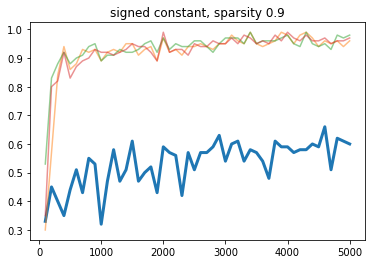

In [40]:
plt.plot([i*100 for i in range(1, 51)], accs_tr_avg_mask, linewidth=3)
for mask in accs_tr_rnd_mask:
    plt.plot([i*100 for i in range(1, 51)], mask, alpha=0.5)
plt.title('signed constant, sparsity 0.9')

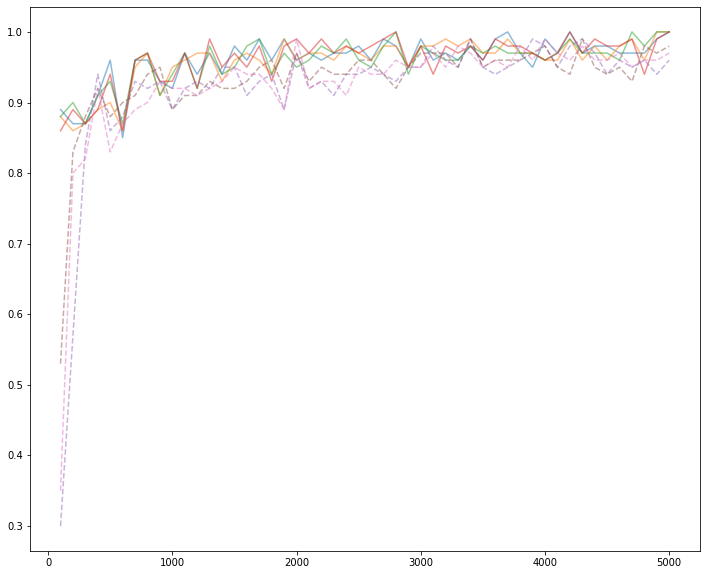

In [13]:
plt.figure(figsize=(12,10))
line = ['-']*4 + ['--']*3
for idx, mask in enumerate(accs_tr_rnd_mask):
    plt.plot([i*100 for i in range(1, 51)], mask, line[idx], alpha=0.5)

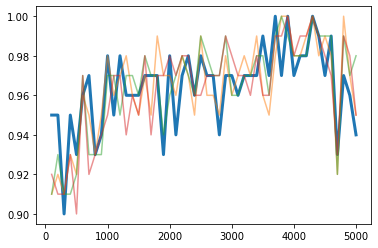

In [40]:
plt.plot([i*100 for i in range(1, 51)], accs_ts_avg_mask, linewidth=3)
for mask in accs_ts_rnd_mask:
    plt.plot([i*100 for i in range(1, 51)], mask, alpha=0.5)

In [ ]:
# Errors:
# 2.1, 2.7, 2.5, 2.8
# 1.8

In [36]:
random_mask = {}
random_mask['w1'] = np.random.choice(2, p=[0.9, 0.1], size=dicts[0]['w1'].shape).astype(np.float32)
random_mask['w2'] = np.random.choice(2, p=[0.9, 0.1], size=dicts[0]['w2'].shape).astype(np.float32)
random_mask['w3'] = np.random.choice(2, p=[0.9, 0.1], size=dicts[0]['w3'].shape).astype(np.float32)

random_mask['b1'] = dicts[0]['b1']
random_mask['b2'] = dicts[0]['b2']
random_mask['b3'] = dicts[0]['b3']

In [37]:
with open('masks_lenet300/random_3', 'wb') as f:
    pickle.dump(random_mask, f)

In [18]:
dicts[0]['w1'].shape

(784, 300)

In [26]:
np.random.choice(2, p=[0.9, 0.1], size=(3,4)).astype(np.float32)

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [15]:
random_mask['w1'].shape

(784, 300)

In [43]:
intersection_real = []
for i in np.random.randint(1000, size=60):
    for j in np.random.randint(1000, size = 30):
        intersection = 0
        for w in ['w1', 'w2', 'w3']:
            intersection += np.sum(dicts[j][w] * dicts[i][w])
        intersection /= total_elems
        intersection_real.append(intersection)
        
intersection_random = []
for i in np.random.randint(1000, size=400):
    intersection = 0
    random_mask = {}
    random_mask['w1'] = np.random.choice(2, p=[0.9, 0.1], size=dicts[0]['w1'].shape).astype(np.float32)
    random_mask['w2'] = np.random.choice(2, p=[0.9, 0.1], size=dicts[0]['w2'].shape).astype(np.float32)
    random_mask['w3'] = np.random.choice(2, p=[0.9, 0.1], size=dicts[0]['w3'].shape).astype(np.float32)

    random_mask['b1'] = dicts[0]['b1']
    random_mask['b2'] = dicts[0]['b2']
    random_mask['b3'] = dicts[0]['b3']    
    
    random_mask2 = {}
    random_mask2['w1'] = np.random.choice(2, p=[0.9, 0.1], size=dicts[0]['w1'].shape).astype(np.float32)
    random_mask2['w2'] = np.random.choice(2, p=[0.9, 0.1], size=dicts[0]['w2'].shape).astype(np.float32)
    random_mask2['w3'] = np.random.choice(2, p=[0.9, 0.1], size=dicts[0]['w3'].shape).astype(np.float32)

    random_mask2['b1'] = dicts[0]['b1']
    random_mask2['b2'] = dicts[0]['b2']
    random_mask2['b3'] = dicts[0]['b3']
    for w in ['w1', 'w2', 'w3']:
        intersection += np.sum(random_mask[w] * random_mask2[w])
    intersection /= total_elems
    intersection_random.append(intersection)

In [44]:
np.mean(intersection_real)

0.027156018866349444

In [45]:
np.mean(intersection_random)

0.010002451164537941

In [31]:
tmp1 = np.random.choice(2, size=(5,7))
tmp2 = np.random.choice(2, size=(5,7))
tmp1==tmp2 * tmp1

array([[ True,  True, False,  True, False,  True, False],
       [ True, False, False, False, False,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True, False,  True],
       [ True, False, False,  True,  True,  True,  True]])

In [34]:
intersections = []
for mask_count in range(2, 7):
    inters_tmp = []
    for _ in range(5000):
        idxs = np.random.randint(1000, size=mask_count)
        intersection = 0
        for w in ['w1', 'w2', 'w3']:
            intersected_mask = dicts[idxs[0]][w].copy()
            for idx in idxs[1:]:
                intersected_mask *= dicts[idx][w]
            intersection += np.sum(intersected_mask)
            
        intersection /= total_elems
        inters_tmp.append(intersection)
    intersections.append(np.mean(inters_tmp))

Text(0.5, 0, 'number of masks')

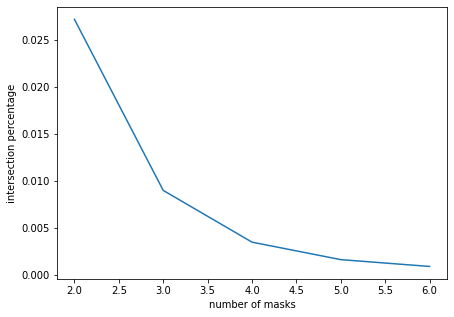

In [44]:
plt.figure(figsize=(7,5))
plt.plot(range(2,7), intersections)
plt.ylabel('intersection percentage')
plt.xlabel('number of masks')

In [36]:
intersections

[0.027181685950413224,
 0.008958099173553719,
 0.0034469767092411715,
 0.0015840631104432755,
 0.0008582283996994741]